# Week 11 - More Algorithms

For this assignment, we're going to do some more work on thinking about and understanding algorithms.


1 - Linear verus Binary search 
---

Below are functions that implement binary search and linear search in Python as well as some code that runs timing tests using the `%%timeit` magic word.  Review the code below and then answer a few questions about the code and the timing.

In [29]:
#------------------------------------------------------------------------
# This is binary search function
# a = the presorted list to search within
# b = the value to search for
#------------------------------------------------------------------------
from bisect import bisect_left
def bin_search(a, x):
    i = bisect_left(a, x)
    if i != len(a) and a[i] == x:
        return i
    else:
        return -1
    
#------------------------------------------------------------------------
# This is a linear search function that doesn't cause an exception
#------------------------------------------------------------------------
def lin_search(a, x):
    try:
        return a.index(x)
    except:
        return -1

#------------------------------------------------------------------------
# Create and sort a list of 1000 random numbers between 0 and 1000
#------------------------------------------------------------------------
import random
def generate_list(size):
    vals = []
    for i in range(size):
        vals.append(random.randrange(0,size))
    return vals

vals = generate_list(1000)
vals.sort()

**Binary Search Timing**

In [30]:
%%timeit -n 10000 -r 1
bin_search(vals, random.randrange(0,size))

1.92 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)


**Linear Search Timing**

In [31]:
%%timeit -n 10000 -r 1
lin_search(vals, random.randrange(0,size))

12.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)


---

**Q1: Given the pre-sorted list of random numbers, which algorithm performs faster: linear search or binary search?**


**Q2: According to the timing tests above, how much faster (on average) is the faster algorithm?**


**Q3: Explain why the faster algorithm performs faster than the slower one?**


---

2 - Data that isn't presorted
---

Often, your data won't come to you presorted, so you can't just use binary search.  However, you can create a sorted copy of your input data as shown above (line 31 of the code for question 1).

Sorting the data requires some one-time overhead.

---

**Q1: Explain when it would be worthwhile to take the extra time to presort the data.**


**Q2: Explain when it would not be worthwile to take the time to presort the data.**


---

# 3 - Timing multiple steps

In this section, we're going to setup some code to time a scenario where you might need to search the same list multiple times.  In this case, a "sort once then binary search multiple times" approach might or might not be better than a simple linear search.  We're going to see if we can determine which.

Our two variables will be:
```
v_count = Number of values to be searched
s_count = Number of times to search
```

In [92]:
# NOTE that running this code may take a few minutes.  
# It is going to run more than 9000 performance tests for various scenarios.

import time
v_counts = list(range(100,10000,100))
s_counts = list(range(1,1000,10))

results = [] # Store (v_count, s_count, lin_search_time, sort_time, bin_search_time)

# Run the test loop for each of our possible value-counts and search-counts
for v_count in v_counts:
    
    # First, generate the list of that many values
    vals_unsorted = generate_list(v_count)
    
    # Record how long to sort the list
    start = time.perf_counter()
    vals_sorted = sorted(vals_unsorted)
    end = time.perf_counter()
    sort_time = (end - start) * 1000

    for s_count in s_counts:
        # Now do s_count number of linear searches
        start = time.perf_counter()
        for i in range(s_count):
            lin_search(vals_unsorted, random.randrange(0,v_count+1))
        end = time.perf_counter()
        lin_search_time = (end - start)*1000

        # Now do s_count number of binary searches
        start = time.perf_counter()
        for i in range(s_count):
            bin_search(vals_sorted, random.randrange(0,v_count+1))
        end = time.perf_counter()
        bin_search_time = (end - start)*1000
        
        results.append((v_count, s_count, lin_search_time, sort_time, bin_search_time))
    


In [93]:
import pandas as pd
data = pd.DataFrame(results, columns=["v_count","s_count","lin_search_time","sort_time","bin_search_time"])
data['bin_search'] = data['sort_time'] + data['bin_search_time']

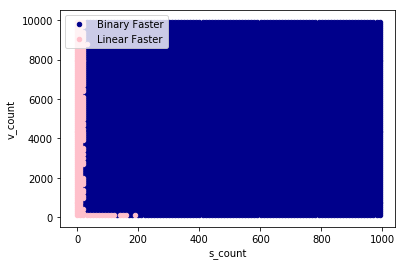

In [94]:
ax = data.loc[data['bin_search'] < data['lin_search_time']].plot.scatter(x='s_count',y='v_count',color='DarkBlue',label='Binary Faster')
ax = data.loc[data['bin_search'] > data['lin_search_time']].plot.scatter(x='s_count',y='v_count',color='Pink',label='Linear Faster', ax=ax)
ax

---

**Q1: If we had 8000 values in our input list and had to do 800 searches, would it be faster to do linear or binary search?**

**Q2: Describe what the graph above is telling us about performance of "sort and binary search" versus "linear search".**

---

# 4 - Binary versus Linear

Given a scenario where you are going to need to do a fixed number of search (e.g. 401), we can look at how performance of linear search and binary search with a presort step compare in their scalability relative to the number of values in the list.  Consider the chart below and answer the following questions.

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


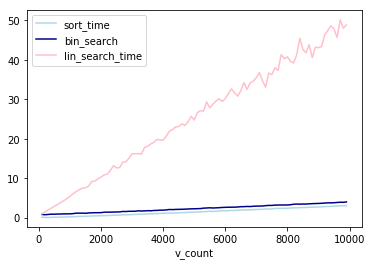

In [100]:
data.loc[data['s_count']==401].plot(x='v_count',y=['sort_time','bin_search','lin_search_time'],color=['LightBlue','DarkBlue','Pink'])


---

**Q1: How would you describe the relationship between linear search and the number of values in the input list?**


**Q2: When doing a binary search, which activity (the sort or the remaining search time) dominates the time it takes to do the entire search process?**

---

